In [2]:
import numpy as np
import pandas as pd

# Home task №1. Car Price Competition.
1. Form a team of 3-4 people.
2. Report your team to Teams.
3. Sign up on https://www.kaggle.com/ and join the copmetition https://www.kaggle.com/t/ce3d3a3323b94d16a56f54bcf7672c71. 
4. Train the regression model on the provided training data.
5. Produce predictions for the test data.
6. Upload predictions to Kaggle.
7. Overcome naive and then advanced accuracy threshold.
8. Upload the code to reproduce your final solution to BlackBoard (with all required sections). 
9. You are gorgeous!

**Deadline: 10.04.2023 23:59**

In [3]:
train_data = pd.read_csv('cars_train.csv', index_col='id')
train_data

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,tax(£),price
id,,,,,,,,,,,
0,vauxhall,Astra,2017.0,Manual,19000 km,Diesel,20.0,72.4,1.6,NaN,10095
1,ford,Focus,2017.0,Manual,26973 km,Petrol,145.0,57.7,1.0,NaN,11999
2,Mercedes-Benz,A Class,2019.0,Manual,2078 km,Petrol,145.0,47.1,1.3,NaN,23299
3,toyota,Aygo,2016.0,Manual,20169 km,Petrol,0.0,69.0,1.0,NaN,6698
4,bmw,4 Series,2016.0,Manual,97706 km,Diesel,30.0,62.8,2.0,NaN,11250
...,...,...,...,...,...,...,...,...,...,...,...
98943,audi,A8,2018.0,Automatic,4284 km,Petrol,145.0,37.7,3.0,NaN,38500
98944,vauxhall,Mokka X,2019.0,Manual,9558 km,Petrol,145.0,39.2,1.4,NaN,14298
98945,vw,Passat,2016.0,Manual,51241 km,Diesel,20.0,68.9,2.0,NaN,11995


## 1. Preprossessing

In [4]:
X, y = train_data.drop(columns=['price']), train_data['price']

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98948 entries, 0 to 98947
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         98948 non-null  object 
 1   model         98948 non-null  object 
 2   year          98939 non-null  float64
 3   transmission  98948 non-null  object 
 4   mileage       98948 non-null  object 
 5   fuelType      98948 non-null  object 
 6   tax           85970 non-null  float64
 7   mpg           90426 non-null  float64
 8   engineSize    98948 non-null  float64
 9   tax(£)        4456 non-null   float64
dtypes: float64(5), object(5)
memory usage: 8.3+ MB


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3)

In [7]:
numeric_features = X.select_dtypes('number').columns.tolist()
numeric_features

['year', 'tax', 'mpg', 'engineSize', 'tax(£)']

In [8]:
nominal_features = X.select_dtypes(object).columns
nominal_features

Index(['brand', 'model', 'transmission', 'mileage', 'fuelType'], dtype='object')

In [ ]:
# pip install sklearn-pandas
# conda install -c conda-forge sklearn-pandas

In [9]:
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
from sklearn.impute import SimpleImputer

# https://dunyaoguz.github.io/my-blog/dataframemapper.html
from sklearn_pandas import DataFrameMapper

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
from sklearn.preprocessing import OneHotEncoder

mapper = DataFrameMapper([([feature], SimpleImputer()) for feature in numeric_features] +\
                         [([feature], OneHotEncoder(handle_unknown = 'ignore')) for feature in nominal_features], 
                            df_out=True)

mapper

DataFrameMapper(df_out=True, drop_cols=[],
                features=[(['year'], SimpleImputer()),
                          (['tax'], SimpleImputer()),
                          (['mpg'], SimpleImputer()),
                          (['engineSize'], SimpleImputer()),
                          (['tax(£)'], SimpleImputer()),
                          (['brand'], OneHotEncoder(handle_unknown='ignore')),
                          (['model'], OneHotEncoder(handle_unknown='ignore')),
                          (['transmission'],
                           OneHotEncoder(handle_unknown='ignore')),
                          (['mileage'], OneHotEncoder(handle_unknown='ignore')),
                          (['fuelType'],
                           OneHotEncoder(handle_unknown='ignore'))])

In [10]:
# You can use ColumnTransformer instead of DataFrameMapper

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", SimpleImputer(), numeric_features),
        ("nominal", OneHotEncoder(handle_unknown = 'ignore'), nominal_features),
    ],
    sparse_threshold = 0,
    verbose_feature_names_out=False
)

preprocessor

ColumnTransformer(sparse_threshold=0,
                  transformers=[('numeric', SimpleImputer(),
                                 ['year', 'tax', 'mpg', 'engineSize',
                                  'tax(£)']),
                                ('nominal',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 Index(['brand', 'model', 'transmission', 'mileage', 'fuelType'], dtype='object'))],
                  verbose_feature_names_out=False)

In [11]:
preprocessor.fit_transform(X_train.head())

array([[2.016e+03, 1.250e+02, 5.890e+01, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00],
       [2.017e+03, 1.250e+02, 5.040e+01, 1.400e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00],
       [2.019e+03, 1.450e+02, 5.650e+01, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00],
       [2.019e+03, 1.450e+02, 3.720e+01, 1.400e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000

In [12]:
preprocessor.get_feature_names_out().tolist()

['year',
 'tax',
 'mpg',
 'engineSize',
 'brand_audi',
 'brand_bmw',
 'brand_toyota',
 'brand_vauxhall',
 'model_ A1',
 'model_ Astra',
 'model_ Aygo',
 'model_ Mokka X',
 'model_ X1',
 'transmission_Automatic',
 'transmission_Manual',
 'transmission_Semi-Auto',
 'mileage_10550 km',
 'mileage_1952 km',
 'mileage_2000 km',
 'mileage_22197 km',
 'mileage_22338 km',
 'fuelType_Diesel',
 'fuelType_Petrol']

In [13]:
# You can also wrap any function for data transformation into FunctionTransformer. 
# But if you want to use several ColumnTransformer one after another and want to preserve the column order,
# don't use the 'reminder' parameter (!!), 
# because it will change columns order and brake everything :(

from sklearn.preprocessing import FunctionTransformer

def mileage(data):
    #data.mileage = ...
    return data

def year(data):
    #data.year = ...
    return data

pre_preprocessor = ColumnTransformer(
    transformers=[
        ('brand', 'passthrough', ['brand']),
        ('model', 'passthrough', ['model']),
        ('year',  'passthrough', ['year']),
        ('transmission', 'passthrough', ['transmission']),
        ('mileage', FunctionTransformer(func=mileage, validate=False, feature_names_out='one-to-one'), ['mileage']),
        ('fuelType', 'passthrough', ['fuelType']),
        ('tax', 'passthrough', ['tax']),
        ('mpg', 'passthrough', ['mpg']),
        ('engineSize', 'passthrough', ['engineSize']),
        ('tax(£)', 'drop', ['tax(£)']),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False)

pre_preprocessor


ColumnTransformer(transformers=[('brand', 'passthrough', ['brand']),
                                ('model', 'passthrough', ['model']),
                                ('year', 'passthrough', ['year']),
                                ('transmission', 'passthrough',
                                 ['transmission']),
                                ('mileage',
                                 FunctionTransformer(feature_names_out='one-to-one',
                                                     func=<function mileage at 0x104b6fca0>),
                                 ['mileage']),
                                ('fuelType', 'passthrough', ['fuelType']),
                                ('tax', 'passthrough', ['tax']),
                                ('mpg', 'passthrough', ['mpg']),
                                ('engineSize', 'passthrough', ['engineSize']),
                                ('tax(£)', 'drop', ['tax(£)'])],
                  verbose_feature_names_out=False)

In [14]:
pre_preprocessor.fit_transform(X_train)

array([['bmw', ' X1', 2016.0, ..., 125.0, 58.9, 2.0],
       ['vauxhall', ' Astra', 2017.0, ..., 125.0, 50.4, 1.4],
       ['toyota', ' Aygo', 2019.0, ..., 145.0, 56.5, 1.0],
       ...,
       ['vauxhall', ' Corsa', 2019.0, ..., 145.0, 43.5, 1.4],
       ['ford', ' Fiesta', 2017.0, ..., 145.0, 65.7, 1.0],
       ['toyota', ' Auris', 2016.0, ..., 0.0, 72.4, 1.8]], dtype=object)

In [15]:
pre_preprocessor.get_feature_names_out()

array(['brand', 'model', 'year', 'transmission', 'mileage', 'fuelType',
       'tax', 'mpg', 'engineSize'], dtype=object)

In [16]:
X_train_transformed = pd.DataFrame(pre_preprocessor.fit_transform(X_train), 
                                   columns=pre_preprocessor.get_feature_names_out())
X_train_transformed

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,bmw,X1,2016.0,Manual,22197 km,Diesel,125.0,58.9,2.0
1,vauxhall,Astra,2017.0,Semi-Auto,10550 km,Petrol,125.0,50.4,1.4
2,toyota,Aygo,2019.0,Manual,22338 km,Petrol,145.0,56.5,1.0
3,vauxhall,Mokka X,2019.0,Automatic,2000 km,Petrol,145.0,37.2,1.4
4,audi,A1,2019.0,Semi-Auto,1952 km,Petrol,145.0,44.1,1.0
...,...,...,...,...,...,...,...,...,...
69258,audi,Q3,2020.0,Manual,2574 km,Petrol,145.0,40.9,1.5
69259,Mercedes-Benz,S Class,2009.0,Automatic,122000 km,Diesel,325.0,36.7,3.0
69260,vauxhall,Corsa,2019.0,Manual,1821 km,Petrol,145.0,43.5,1.4
69261,ford,Fiesta,2017.0,Manual,17436 km,Petrol,145.0,65.7,1.0


In [17]:
numeric = ['year', 'tax', 'mpg', 'engineSize']
nominal = ['brand', 'model', 'transmission', 'fuelType']

correct_preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", SimpleImputer(), numeric),
        ("nominal", OneHotEncoder(handle_unknown = 'ignore'), nominal),
    ],
    sparse_threshold = 0,
    verbose_feature_names_out=False
)

correct_preprocessor

ColumnTransformer(sparse_threshold=0,
                  transformers=[('numeric', SimpleImputer(),
                                 ['year', 'tax', 'mpg', 'engineSize']),
                                ('nominal',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['brand', 'model', 'transmission',
                                  'fuelType'])],
                  verbose_feature_names_out=False)

In [1]:
# After this section you should have preprocessed data or/and preprocessor that you can use for the test data as well.

## 2. Model training

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor

pipeline = Pipeline(steps = [('preprocessing', correct_preprocessor), 
                             ('scaler', StandardScaler()),
                             ('classifier', DummyRegressor())
                            ])

#pipeline.fit(X_train_transformed.head(1000), y_train.head(1000))
#pipeline.fit_transform(X_train.head(1000))
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('numeric', SimpleImputer(),
                                                  ['year', 'tax', 'mpg',
                                                   'engineSize']),
                                                 ('nominal',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['brand', 'model',
                                                   'transmission',
                                                   'fuelType'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('classifier', DummyRegressor())])

In [21]:
params = {'preprocessing__numeric__strategy': ['mean', 'median'],
          'classifier__strategy': ['mean', 'median'],
         }

In [25]:
from sklearn.model_selection import GridSearchCV, KFold

grid = GridSearchCV(pipeline,
                    params,
                    refit=True,
                    scoring='neg_mean_absolute_percentage_error',
                    n_jobs = 1,
                    cv=KFold(n_splits = 4, shuffle=False),
                    return_train_score=True,
                    verbose=5
                   )

grid_best_model = grid.fit(X_train_transformed.head(1000), y_train.head(1000))

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV 1/4] END classifier__strategy=mean, preprocessing__numeric__strategy=mean;, score=(train=-0.562, test=-0.669) total time=   0.0s
[CV 2/4] END classifier__strategy=mean, preprocessing__numeric__strategy=mean;, score=(train=-0.586, test=-0.635) total time=   0.0s
[CV 3/4] END classifier__strategy=mean, preprocessing__numeric__strategy=mean;, score=(train=-0.575, test=-0.595) total time=   0.0s
[CV 4/4] END classifier__strategy=mean, preprocessing__numeric__strategy=mean;, score=(train=-0.624, test=-0.452) total time=   0.0s
[CV 1/4] END classifier__strategy=mean, preprocessing__numeric__strategy=median;, score=(train=-0.562, test=-0.669) total time=   0.0s
[CV 2/4] END classifier__strategy=mean, preprocessing__numeric__strategy=median;, score=(train=-0.586, test=-0.635) total time=   0.0s
[CV 3/4] END classifier__strategy=mean, preprocessing__numeric__strategy=median;, score=(train=-0.575, test=-0.595) total time=   0.0s
[CV

In [26]:
grid.cv_results_

{'mean_fit_time': array([0.00710124, 0.00433171, 0.00369072, 0.00465846]),
 'std_fit_time': array([0.00344717, 0.00033292, 0.00011231, 0.00141501]),
 'mean_score_time': array([0.00339347, 0.00181431, 0.00161844, 0.00168556]),
 'std_score_time': array([2.09643311e-03, 1.91563978e-04, 5.18321593e-05, 1.31247357e-04]),
 'param_classifier__strategy': masked_array(data=['mean', 'mean', 'median', 'median'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_preprocessing__numeric__strategy': masked_array(data=['mean', 'median', 'mean', 'median'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'classifier__strategy': 'mean',
   'preprocessing__numeric__strategy': 'mean'},
  {'classifier__strategy': 'mean',
   'preprocessing__numeric__strategy': 'median'},
  {'classifier__strategy': 'median',
   'preprocessing__numeric__strategy': 'mean'},
  {'classifier__strategy': 'med

In [27]:
pd.concat([pd.DataFrame(grid.cv_results_['params']), 
           pd.DataFrame(data=list(zip(grid.cv_results_['mean_train_score'],
                                      grid.cv_results_['mean_test_score'])),
                        columns=['mean_train_score', 'mean_test_score'])
          ], 
          axis=1).sort_values('mean_test_score', ascending=False) #.style.bar(vmin=0, vmax=1)

,classifier__strategy,preprocessing__numeric__strategy,mean_train_score,mean_test_score
2,median,mean,-0.486743,-0.487688
3,median,median,-0.486743,-0.487688
0,mean,mean,-0.587011,-0.587889
1,mean,median,-0.587011,-0.587889


In [28]:
# If you don't agree with the GS best model choice, you can refit your model mannually using other params

grid.best_params_

{'classifier__strategy': 'median', 'preprocessing__numeric__strategy': 'mean'}

In [29]:
# You can train different models using GridSearch 
# and then compare different models with the best params on test

X_test

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,tax(£)
id,,,,,,,,,,
26551,audi,A3,2018.0,Semi-Auto,10413 km,Diesel,145.0,62.8,2.0,NaN
98210,Mercedes-Benz,C Class,2017.0,Automatic,23063 km,Diesel,NaN,NaN,2.1,NaN
73958,Mercedes-Benz,A Class,2016.0,Semi-Auto,27404 km,Diesel,20.0,74.3,1.5,NaN
57495,vauxhall,Mokka,2014.0,Manual,39447 km,Petrol,205.0,43.5,1.6,NaN
43437,Mercedes-Benz,C Class,2017.0,Automatic,31674 km,Petrol,145.0,47.9,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...
64234,ford,Fiesta,2017.0,Manual,23076 km,Petrol,20.0,62.8,1.0,NaN
58615,toyota,Yaris,2019.0,Automatic,2999 km,Petrol,145.0,47.9,1.5,NaN
48519,toyota,Yaris,2019.0,Manual,2609 km,Petrol,145.0,47.9,1.5,NaN


In [31]:
X_test_transformed

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,audi,A3,2018.0,Semi-Auto,10413 km,Diesel,145.0,62.8,2.0
1,Mercedes-Benz,C Class,2017.0,Automatic,23063 km,Diesel,NaN,NaN,2.1
2,Mercedes-Benz,A Class,2016.0,Semi-Auto,27404 km,Diesel,20.0,74.3,1.5
3,vauxhall,Mokka,2014.0,Manual,39447 km,Petrol,205.0,43.5,1.6
4,Mercedes-Benz,C Class,2017.0,Automatic,31674 km,Petrol,145.0,47.9,2.0
...,...,...,...,...,...,...,...,...,...
29680,ford,Fiesta,2017.0,Manual,23076 km,Petrol,20.0,62.8,1.0
29681,toyota,Yaris,2019.0,Automatic,2999 km,Petrol,145.0,47.9,1.5
29682,toyota,Yaris,2019.0,Manual,2609 km,Petrol,145.0,47.9,1.5
29683,audi,Q7,2019.0,Automatic,7750 km,Diesel,145.0,33.2,3.0


In [30]:
X_test_transformed = pd.DataFrame(pre_preprocessor.transform(X_test), 
                                  columns=pre_preprocessor.get_feature_names_out())
                                   
test_predictions = grid_best_model.predict(X_test_transformed)


In [32]:
from sklearn import metrics

print (f'MAPE test = {round(metrics.mean_absolute_percentage_error(y_true=y_test, y_pred=test_predictions), 3)}')

MAPE test = 0.469


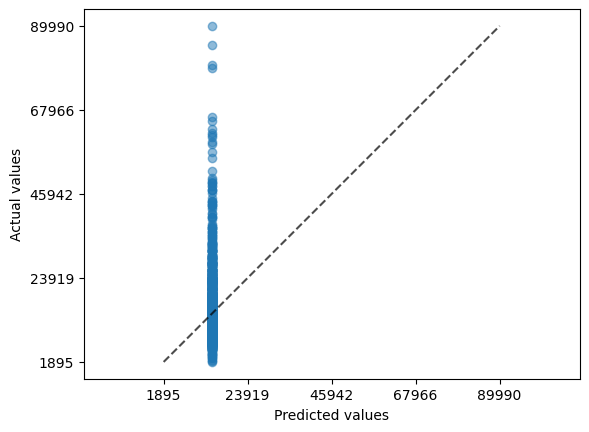

In [33]:
from sklearn.metrics import PredictionErrorDisplay

PredictionErrorDisplay.from_predictions(
    y_test,
    test_predictions,
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
)

In [34]:
grid_best_model

GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(sparse_threshold=0,
                                                          transformers=[('numeric',
                                                                         SimpleImputer(),
                                                                         ['year',
                                                                          'tax',
                                                                          'mpg',
                                                                          'engineSize']),
                                                                        ('nominal',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['brand',
                                                                          'model',
                                                                          'transmission',
                                                                          'fuelType'])],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('classifier', DummyRegressor())]),
             n_jobs=1,
             param_grid={'classifier__strategy': ['mean', 'median'],
                         'preprocessing__numeric__strategy': ['mean',
                                                              'median']},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error', verbose=5)

In [ ]:
# After this section you should have your best model trained

## 3. Submission output

In [35]:
car_test_data = pd.read_csv('cars_test.csv', index_col='id')
car_test_data

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,tax(£)
id,,,,,,,,,,
0,vw,Polo,2019.0,Manual,2999,Petrol,145.0,52.3,1.0,NaN
1,audi,Q5,2019.0,Automatic,6929,Petrol,145.0,34.0,3.0,NaN
2,vauxhall,Corsa,2015.0,Manual,37500,Petrol,30.0,55.4,1.4,NaN
3,Mercedes-Benz,S Class,1998.0,Automatic,43534,Petrol,265.0,23.3,6.0,NaN
4,Hyundai,Kona,2019.0,Automatic,9500,Hybrid,NaN,52.3,1.6,135.0
...,...,...,...,...,...,...,...,...,...,...
9573,ford,Mondeo,2016.0,Semi-Auto,59601,Diesel,125.0,57.7,2.0,NaN
9574,audi,A3,2015.0,Manual,89060,Diesel,30.0,67.3,2.0,NaN
9575,vw,Polo,2019.0,Manual,1267,Petrol,150.0,49.6,1.0,NaN


In [36]:
car_test_data_tr = pd.DataFrame(pre_preprocessor.transform(car_test_data), 
                                columns=pre_preprocessor.get_feature_names_out())
                                   
submission = grid_best_model.predict(car_test_data_tr)
submission

array([14494., 14494., 14494., ..., 14494., 14494., 14494.])

In [37]:
pd.DataFrame(data = submission, index = car_test_data_tr.index, 
             columns=['price'] )#.to_csv('car_test_dummy_predictions.csv')


,price
0,14494.0
1,14494.0
2,14494.0
3,14494.0
4,14494.0
...,...
9573,14494.0
9574,14494.0
9575,14494.0
9576,14494.0


In [ ]:
# After this section you should have your best submission